# UMI shoeboxer & results testing

In [1]:
from umi.ubem import UBEM
from utils.constants import *

import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pathlib import Path
import geopandas as gpd
from ladybug.epw import EPW
from archetypal import UmiTemplateLibrary
import h5py

c:\tools\Anaconda3\envs\ml-for-bem-final\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package energy-pandas is out of date. Your version is 0.3.3, the latest is 0.3.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


[Taichi] version 1.6.0, llvm 15.0.1, commit f1c6fbbd, win, python 3.8.17
[Taichi] Starting on arch=cuda


## 1. Open and build umi shoeboxes from .umi (unsimulated)

In [2]:
umi_test = UBEM.open_umi(
        filename="D:/Users/zoelh/GitRepos/ml-for-building-energy-modeling/umi_data/Florianopolis/Florianopolis_Baseline_unsimulated.umi",
    )

INFO:UMI:reading input file...
DEBUG:UMI:TEMPORARY LOCATION C:\Users\zoelh\AppData\Local\Temp\tmpo60esfjg
INFO:UMI:Successfully loaded EPW file Data for [Florianópolis]
INFO:UMI:Opening archetpal templates at template-library.json
INFO:UMI:Read 18.1KB from D:/Users/zoelh/GitRepos/ml-for-building-energy-modeling/umi_data/Florianopolis/Florianopolis_Baseline_unsimulated.umi in 0.57 seconds
DEBUG:UMI:Fetching BuildingTemplate vector data from RefBldgFullServiceRestaurantPost1980_v1.4_7.2_2A_USA_TX_HOUSTON
DEBUG:UMI:Found facade with r_value 3.76 and tmass bin 2
DEBUG:UMI:Found slab with r_value 0.08
DEBUG:UMI:Found roof with r_value 0.06 and tmass bin 3
DEBUG:UMI:Using internal shgc calculation.
DEBUG:UMI:Fetching BuildingTemplate vector data from RefBldgMediumOfficeNew2004_v1.4_7.2_2A_USA_TX_HOUSTON
DEBUG:UMI:Found facade with r_value 2.6 and tmass bin 3
DEBUG:UMI:Found slab with r_value 0.28
DEBUG:UMI:Found roof with r_value 3.53 and tmass bin 2
DEBUG:UMI:Using internal shgc calculation

## or 2. Load from gdf, epw, and template_lib directly

In [2]:
gdf = gpd.read_file(Path("data") / "gis" / "Florianopolis_Baseline.zip")

# dict to store key fields for known gis files
id_cols = {
        "height_col": "HEIGHT",
        "id_col": "OBJECTID",
        "template_name_col": "template_name",
        "wwr_col": "wwr",
}

epw_fp = (
    Path("data")
    / "epws"
    / "global_epws_indexed"
    / "cityidx_0033_BRA_SP-São Paulo-Congonhas AP.837800_TRY Brazil.epw"
)

epw = EPW(epw_fp)
template_lib = UmiTemplateLibrary.open(
    Path("data") / "template_libs" / "BostonTemplateLibrary.json"
)

# Insert dummy template names
gdf[id_cols["template_name_col"]] = np.random.choice(
    [t.Name for t in template_lib.BuildingTemplates], size=gdf.shape[0]
)
# insert dummy wwrs
gdf[id_cols["wwr_col"]] = 0.4

umi_test = UBEM(
    gdf=gdf,
    **id_cols,
    epw=epw,
    template_lib=template_lib,
    shoebox_width=3,
    floor_to_floor_height=4,
    perim_offset=PERIM_OFFSET,
)

print("SCHEDULES ARRAY: ", umi_test.schedules_array.shape)
print("TEMPLATE DF: ", umi_test.template_features_df.shape)
print("EPW ARRAY: ", umi_test.epw_array.shape)

# TODO:
# Shading vector / RayTracing
# mapping
# using numerics for orientation instead of words?
# infiltration/ventilation etc


DEBUG:UMI:Fetching BuildingTemplate vector data from B_Off_0
DEBUG:UMI:Found facade with r_value 2.06 and tmass bin 1
DEBUG:UMI:Found slab with r_value 0.71
DEBUG:UMI:Found roof with r_value 3.25 and tmass bin 0
DEBUG:UMI:Fetching BuildingTemplate vector data from B_Ret_0
DEBUG:UMI:Found facade with r_value 2.06 and tmass bin 1
DEBUG:UMI:Found slab with r_value 0.71
DEBUG:UMI:Found roof with r_value 3.25 and tmass bin 0
DEBUG:UMI:Fetching BuildingTemplate vector data from B_Res_0_Masonry
DEBUG:UMI:Found facade with r_value 2.06 and tmass bin 1
DEBUG:UMI:Found slab with r_value 0.71
DEBUG:UMI:Found roof with r_value 3.3 and tmass bin 1
DEBUG:UMI:Fetching BuildingTemplate vector data from B_Res_0_WoodFrame
DEBUG:UMI:Found facade with r_value 2.84 and tmass bin 3
DEBUG:UMI:Found slab with r_value 0.71
DEBUG:UMI:Found roof with r_value 3.3 and tmass bin 1
INFO:Radiation Analysis:Beginning sky matrix extraction...
INFO:Radiation Analysis:Building Count: 93
INFO:Radiation Analysis:Approximat

SCHEDULES ARRAY:  (4, 3, 8760)
TEMPLATE DF:  (4, 25)
EPW ARRAY:  (7, 8760)


In [3]:
print(umi_test.shoeboxes_df.shape)
umi_test.shoeboxes_df.head()

(636, 59)


,building_id,orientation,roof_2_footprint,ground_2_footprint,floor_name,wwr,height,footprint_area,core_2_perim,floor_2_facade,...,shading_2,shading_3,shading_4,shading_5,shading_6,shading_7,shading_8,shading_9,shading_10,shading_11
0,0,east,0.0,1.0,bottom,0.4,33.6,255.916544,0.623828,0.072682,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,east,0.0,0.0,middle,0.4,33.6,255.916544,0.623828,0.072682,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,east,1.0,0.0,top,0.4,33.6,255.916544,0.623828,0.072682,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,north,0.0,1.0,bottom,0.4,33.6,255.916544,0.623828,0.072682,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0,north,0.0,0.0,middle,0.4,33.6,255.916544,0.623828,0.072682,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
umi_test.shoeboxes_df.columns

Index(['building_id', 'orientation', 'roof_2_footprint', 'ground_2_footprint',
       'floor_name', 'wwr', 'height', 'footprint_area', 'core_2_perim',
       'floor_2_facade', 'floor_count', 'template_name', 'north_weight',
       'east_weight', 'south_weight', 'west_weight', 'bottom', 'top', 'middle',
       'exclusive', 'PeopleDensity', 'LightingPowerDensity',
       'EquipmentPowerDensity', 'Infiltration', 'VentilationPerArea',
       'VentilationPerPerson', 'VentilationMode', 'HeatingSetpoint',
       'CoolingSetpoint', 'humid_max', 'humid_min', 'sat_max', 'sat_min',
       'RecoverySettings', 'EconomizerSettings', 'FacadeRValue', 'FacadeMass',
       'RoofRValue', 'RoofMass', 'SlabRValue', 'WindowShgc', 'WindowUValue',
       'visible_transmittance', 'template_idx', 'oriented_weight',
       'floor_weight', 'weight', 'shading_0', 'shading_1', 'shading_2',
       'shading_3', 'shading_4', 'shading_5', 'shading_6', 'shading_7',
       'shading_8', 'shading_9', 'shading_10', 'shading

In [5]:
umi_test.building_gdf.head()

,HEIGHT,OBJECTID,BUILTYPE,ACNV,geometry,template_name,wwr,template_idx,cores,N_FLOORS,ARCHETYPE_ID
0,33.6,0,residential,20,"POLYGON ((87.298 128.240, 97.614 137.498, 109....",B_Off_0,0.4,0,"POLYGON ((741920.733 6944813.243, 741926.629 6...",9.0,B_Off_0
1,5.6,1,educational,10,"POLYGON ((110.127 189.093, 118.838 196.216, 12...",B_Off_0,0.4,0,"POLYGON ((741943.395 6944873.778, 741947.623 6...",2.0,B_Off_0
2,5.6,2,restaurant,10,"POLYGON ((168.942 70.197, 198.675 97.055, 201....",B_Ret_0,0.4,1,POLYGON EMPTY,2.0,B_Ret_0
3,11.2,3,restaurant,20,"POLYGON ((69.185 120.627, 82.845 132.308, 88.9...",B_Off_0,0.4,0,"POLYGON ((741902.711 6944805.613, 741911.769 6...",3.0,B_Off_0
4,2.8,4,night_club,10,"POLYGON ((108.464 136.160, 123.317 149.696, 12...",B_Ret_0,0.4,1,"POLYGON ((741941.916 6944821.209, 741946.695 6...",1.0,B_Ret_0


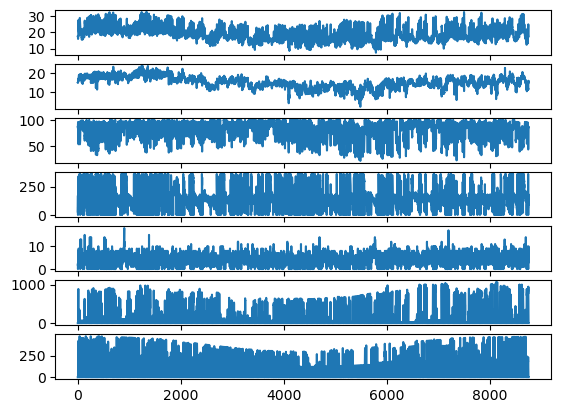

In [3]:
fig, ax = plt.subplots(umi_test.epw_array.shape[0], 1)
for i, row in enumerate(umi_test.epw_array):
    ax[i].plot(row)
plt.show()

In [4]:
print(umi_test.schedules_array.shape)
print(umi_test.schedules_array.min())
print(umi_test.schedules_array.max())

(4, 3, 8760)
0.0
1.0


In [6]:
umi_test.template_features_df

,PeopleDensity,LightingPowerDensity,EquipmentPowerDensity,Infiltration,VentilationPerArea,VentilationPerPerson,VentilationMode,HeatingSetpoint,CoolingSetpoint,humid_max,...,FacadeRValue,FacadeMass,RoofRValue,RoofMass,SlabRValue,WindowShgc,WindowUValue,visible_transmittance,template_name,template_idx
B_Off_0,0.055,12.0,8.0,0.35,0.0003,0.0025,MechVentMode.OccupancySchedule,20.0,24.0,81,...,2.063423,ThermalMassConstructions.Brick,3.247183,ThermalMassConstructions.Concrete,0.712997,1.0,6.832098,0.8,B_Off_0,0
B_Ret_0,0.1,16.0,6.0,0.35,0.0006,0.0,MechVentMode.OccupancySchedule,20.0,24.0,81,...,2.063423,ThermalMassConstructions.Brick,3.247183,ThermalMassConstructions.Concrete,0.712997,1.0,6.832098,0.8,B_Ret_0,1
B_Res_0_Masonry,0.025,7.0,4.0,0.35,0.0,0.0,MechVentMode.OccupancySchedule,20.0,24.0,81,...,2.063423,ThermalMassConstructions.Brick,3.300979,ThermalMassConstructions.Brick,0.712997,1.0,6.832098,0.8,B_Res_0_Masonry,2
B_Res_0_WoodFrame,0.025,7.0,4.0,0.35,0.0,0.0,MechVentMode.OccupancySchedule,20.0,24.0,81,...,2.844715,ThermalMassConstructions.SteelFrame,3.300979,ThermalMassConstructions.Brick,0.712997,1.0,6.832098,0.8,B_Res_0_WoodFrame,3


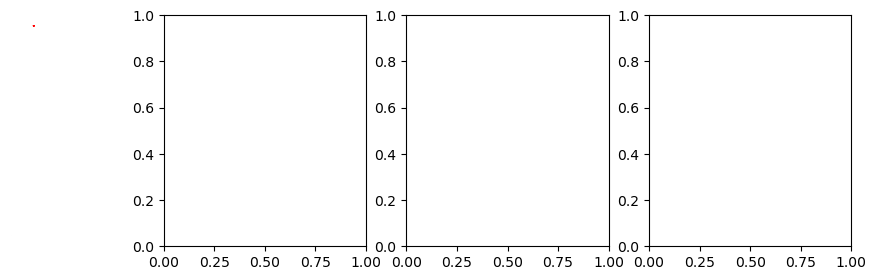

In [5]:
fig, ax = plt.subplots(1, 4, figsize=(12, 3))
ax[0] = umi_test.visualize_2d(ax=ax[0], gdf=umi_test.building_gdf)
# ax[1].hist(umi_test.gis_features_df["core_2_perim"])
# ax[1].set_title("Core 2 Perim")
# ax[2].hist(umi_test.gis_features_df["floor_2_facade"])
# ax[2].set_title("Floor 2 Facade")
# # ax[3].hist(umi_test.gis_features_df["roof_2_footprint"])
# # ax[3].set_title("Roof/Ground 2 Footprint")
# plt.show()

## 3. Open UMI v1 project

We will be running the Florianopolis seed with a variety of different epw files.

The chosen ones:
- 0B: cityidx_0264_VEN_--CARACAS
- 2A: Florianopolis (baseline)
- 4C: cityidx_0725_ESP_--Avila
- 7: cityidx_0305_MNG_--ULAANBATAAR

In [191]:
# Choose 3 random energy files in different climate zones

from utils.constants import EPW_TESTING_LIST_PATH
epw_df = pd.read_csv(EPW_TESTING_LIST_PATH, index_col=0)
epw_df.groupby("CZ").first()["slug"]

CZ
0A       cityidx_0736_PHL_--MANILA.984290_IWEC Data.epw
0B      cityidx_0264_VEN_--CARACAS.804150_IWEC Data.epw
1A    cityidx_0557_IND_Madhya Pradesh-Bhopal.426670_...
1B    cityidx_0829_IND_Delhi-New Delhi.421820_ISHRAE...
2A    cityidx_0828_CHN_Guangdong-Zhengcheng.592940_C...
2B        cityidx_0279_EGY_--CAIRO.623660_IWEC Data.epw
3A    cityidx_0013_JPN_--TOKYO HYAKURI.477150_IWEC D...
3B    cityidx_0729_ISR_--Jerusalem-Atarot AP.401840_...
3C      cityidx_0029_CHN_Yunnan-Kunming.567780_CSWD.epw
4A        cityidx_0599_CHN_Anhui-Boxian.581020_CSWD.epw
4B        cityidx_0217_CHN_Henan-Anyang.538980_CSWD.epw
4C             cityidx_0725_ESP_--Avila.082100_SWEC.epw
5A    cityidx_0564_USA_PA-Pittsburgh Allegheny Co Ap...
5B       cityidx_0252_CHN_Gansu-Jiuquan.525330_CSWD.epw
5C       cityidx_0080_TUR_--ANKARA.171280_IWEC Data.epw
6A     cityidx_0098_CHN_Jilin-Changchun.541610_CSWD.epw
6B       cityidx_0489_CHN_Shanxi-Datong.534870_CSWD.epw
7     cityidx_0305_MNG_--ULAANBATAAR.442920_I

In [68]:
month_map = {
    "january": 744,
    "february": 672,
    "march": 744,
    "april": 720,
    "may": 744,
    "june": 720,
    "july": 744,
    "august": 744,
    "september": 720,
    "october": 744,
    "november": 720,
    "december": 744,
}
sum(list(month_map.values()))

8760

In [176]:
areas = umi_test.building_gdf[['guid', 'footprint_area', 'floor_count']]
areas['tfa'] = areas['footprint_area'] * areas['floor_count']
areas = areas.sort_values("guid")
areas.head()

,guid,footprint_area,floor_count,tfa
47,027e56c0-34b7-714a-9e97-08db9fc15045,46.028564,4.0,184.114256
31,095ce372-1a56-5744-a7be-6350e9250916,92.098678,1.0,92.098678
84,0a11abfe-8782-a241-a8c0-20bd08f70dbb,72.562633,2.0,145.125265
88,11ed3672-e6fb-354f-9f76-fc3e8fbcd50b,194.838924,2.0,389.677849
78,12f9435e-d5cc-bd40-9efa-c6ec52a9f804,82.491006,2.0,164.982013


In [180]:
# Get monthly energy data
def get_monthly(h):
    h.set_index("Building Id", inplace=True)
    h = h[[str(x) for x in range(1, 8761)]]
    h.columns = h.columns.astype("int")
    c = 0
    for month, hours in month_map.items():
        h[month] = h.iloc[:, c:c+hours].sum(axis=1)
        c += hours
    return h[list(month_map.keys())]

seeds = ["caracas", "florianopolis", "avila", "ulaanbataar"]
hourly_data_path = Path(os.path.normpath(os.getcwd() + os.sep + os.pardir)) / "umi_data" / "SeedValidation"
heating = {}
cooling = {}
for city in seeds:
    h = pd.read_csv(hourly_data_path / f"seed_{city}_heating.csv")
    h = get_monthly(h)
    heating[city] = h
    c = pd.read_csv(hourly_data_path / f"seed_{city}_cooling.csv")
    c = get_monthly(c)
    cooling[city] = c

In [181]:
h

,january,february,march,april,may,june,july,august,september,october,november,december
Building Id,,,,,,,,,,,,
027e56c0-34b7-714a-9e97-08db9fc15045,0.479621,31.803273,0.000000,0.000000,0.000000,0,0,0,0,0,0.002967,41.549799
095ce372-1a56-5744-a7be-6350e9250916,0.000000,1011.787120,5276.010321,2073.011816,63.735117,0,0,0,0,0,4570.019214,8360.082994
0a11abfe-8782-a241-a8c0-20bd08f70dbb,1780.328380,2078.963338,2.294443,0.000000,0.000000,0,0,0,0,0,192.484491,1875.452641
11ed3672-e6fb-354f-9f76-fc3e8fbcd50b,4658.893388,5371.955999,4.897170,0.000000,0.000000,0,0,0,0,0,469.895317,4954.977788
12f9435e-d5cc-bd40-9efa-c6ec52a9f804,0.000000,913.076024,4799.468191,1956.398130,58.802129,0,0,0,0,0,4468.664454,7499.526481
...,...,...,...,...,...,...,...,...,...,...,...,...
f7639920-472d-684e-ad8c-58d9e3e47d8d,0.000000,4800.328999,26101.359496,9830.104170,240.872373,0,0,0,0,0,20488.945728,46223.313319
f897dfda-495c-fa4c-b699-838a134581a9,0.000000,0.000000,141.903388,267.379984,0.000000,0,0,0,0,0,0.000000,2532.939637
fa78e0aa-51dd-9448-a581-d403fbf76a4e,0.000000,25.168556,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,12.040287


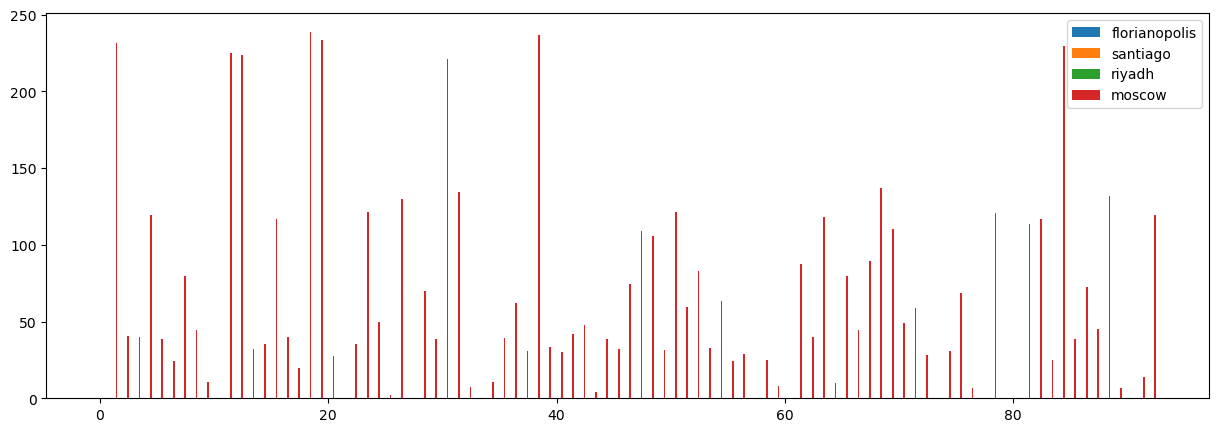

In [188]:
fig, ax = plt.subplots(figsize=(15, 5))
mlt = 0
width = 0.15
x = np.arange(93)
for city, vals in heating.items():
    offset = width * mlt
    rects = ax.bar(x + offset, vals.sum(axis=1)/areas['tfa'].to_numpy(), width, label=city)
    mlt += 1
plt.legend()

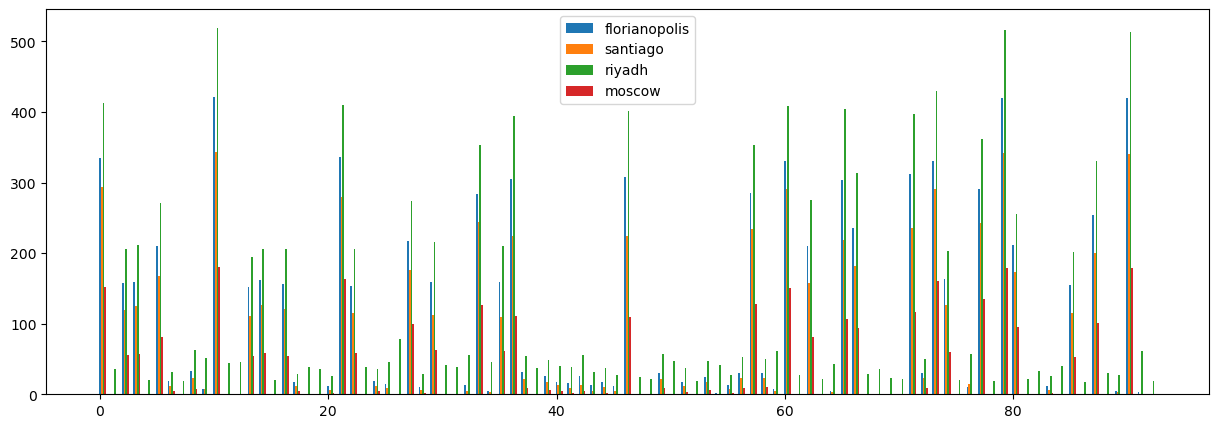

In [189]:
fig, ax = plt.subplots(figsize=(15, 5))
mlt = 0
for city, vals in cooling.items():
    offset = width * mlt
    rects = ax.bar(x + offset, vals.sum(axis=1)/areas['tfa'].to_numpy(), width, label=city)
    mlt += 1
plt.legend()

### Fetch all the shoeboxes

In [10]:
from pyumi import UmiProject
from pyumi.shoeboxer import ShoeBox
from pyumi.umi_project import ShoeBoxCollection

In [11]:
def fetch_shoeboxes(simulated_shoeboxdf):
    shoeboxes = ShoeBoxCollection()
    df = (
        simulated_shoeboxdf.reset_index()
        .groupby("ShoeboxPath")
        .first()
        .reset_index()
    )
    for _, row in df.iterrows():
        idf_path = row["ShoeboxPath"]
        shoeboxes[idf_path] = ShoeBox(idf_path)
    return shoeboxes

def set_energy_path(simulated_shoeboxdf, new_path):
    old_paths = simulated_shoeboxdf["ShoeboxPath"]
    new_paths = []

    new_path = os.path.normpath(new_path)
    to_match = new_path.split(os.sep)[-1]
    idx = old_paths[0].split("\\").index(to_match)
    for p in old_paths:
        p = p.split("\\")
        new_p = new_path
        for i in range(idx + 1, len(p)):
            new_p = os.path.join(new_p, p[i])
        new_paths.append(new_p)

    simulated_shoeboxdf["ShoeboxPath"] = new_paths
    return simulated_shoeboxdf

In [12]:
simulated_umi_path = "D:/Users/zoelh/GitRepos/ml-for-building-energy-modeling/umi_data/Florianopolis/Florianopolis_Baseline_simulated.umi"
energy_path = "D:/Users/zoelh/GitRepos/ml-for-building-energy-modeling/umi_data/Florianopolis/hourly/eplus"
simulated_umi = UmiProject.open(simulated_umi_path)

In [13]:
df = pd.DataFrame.from_dict(simulated_umi.sdl_common["shoebox-weights"])
simulated_shoeboxdf = df.merge(
    simulated_umi.gdf_world, how="left", left_on="ParentBuildingId", right_on="id"
)
simulated_shoeboxdf = set_energy_path(simulated_shoeboxdf, energy_path)
simulated_shoeboxdf.head()

,ParentBuildingId,PerimeterAreaWeight,CoreAreaWeight,PerimeterArea,CoreArea,Orientation,ClusterId,Roof2FloorRatio,Ground2FloorRatio,Floor2Fac,...,Height,Name,Occupancy,TemplateName,UseType,WwrE,WwrN,WwrS,WwrW,geometry
0,b8848bab-34b8-6b44-bb4c-43deca1051a6,5.817445,0.0,240.45439,0.0,West,Group0,0.5,0.5,0.450772,...,8.4,44,134,RefBldgSecondarySchoolNew2004_v1.4_7.2_2A_USA_...,Uncategorized,0.4,0.4,0.4,0.4,"MULTIPOLYGON (((741947.18906 -3055188.98301, 7..."
1,b8848bab-34b8-6b44-bb4c-43deca1051a6,3.878297,0.0,240.45439,0.0,West,Group0,0.5,0.5,0.450772,...,8.4,44,134,RefBldgSecondarySchoolNew2004_v1.4_7.2_2A_USA_...,Uncategorized,0.4,0.4,0.4,0.4,"MULTIPOLYGON (((741947.18906 -3055188.98301, 7..."
2,b8848bab-34b8-6b44-bb4c-43deca1051a6,3.878297,0.0,240.45439,0.0,South,Group0,0.5,0.5,0.450772,...,8.4,44,134,RefBldgSecondarySchoolNew2004_v1.4_7.2_2A_USA_...,Uncategorized,0.4,0.4,0.4,0.4,"MULTIPOLYGON (((741947.18906 -3055188.98301, 7..."
3,b8848bab-34b8-6b44-bb4c-43deca1051a6,5.817445,0.0,240.45439,0.0,South,Group0,0.5,0.5,0.450772,...,8.4,44,134,RefBldgSecondarySchoolNew2004_v1.4_7.2_2A_USA_...,Uncategorized,0.4,0.4,0.4,0.4,"MULTIPOLYGON (((741947.18906 -3055188.98301, 7..."
4,b8848bab-34b8-6b44-bb4c-43deca1051a6,1.939148,0.0,240.45439,0.0,South,Group0,0.5,0.5,0.450772,...,8.4,44,134,RefBldgSecondarySchoolNew2004_v1.4_7.2_2A_USA_...,Uncategorized,0.4,0.4,0.4,0.4,"MULTIPOLYGON (((741947.18906 -3055188.98301, 7..."


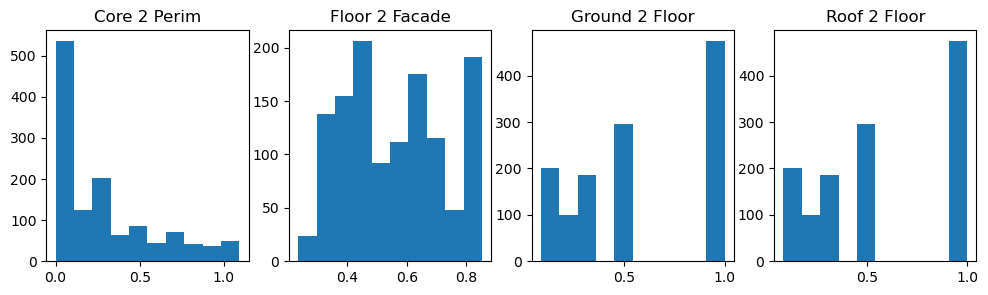

In [31]:
fig, ax = plt.subplots(1, 4, figsize=(12, 3))
ax[0].hist(simulated_shoeboxdf["Core2Perimeter"])
ax[0].set_title("Core 2 Perim")
ax[1].hist(simulated_shoeboxdf["Floor2Fac"])
ax[1].set_title("Floor 2 Facade")
ax[2].hist(simulated_shoeboxdf["Ground2FloorRatio"])
ax[2].set_title("Ground 2 Floor")
ax[3].hist(simulated_shoeboxdf["Roof2FloorRatio"])
ax[3].set_title("Roof 2 Floor")
plt.show()

In [25]:
print(simulated_shoeboxdf.shape)
df = simulated_shoeboxdf.groupby("ShoeboxPath", as_index=False).first()
print(df.shape)

(1255, 25)
(64, 25)


In [10]:
simulated_shoeboxes = fetch_shoeboxes(df)

In [11]:
from archetypal import settings
import subprocess

settings.energyplus_location = Path("D:\EnergyPlusV22-2-0")
settings.ep_version = "22.2.0"

def convert(fullpath):
    # Define the command and its arguments
    output_directory, path = os.path.split(fullpath)
    cmd = (
        settings.energyplus_location
        / f"energyplus{'.exe' if os.name == 'nt' else ''}"
    )
    args = ["--convert-only", "--output-directory", output_directory, fullpath]

    # TODO change location of idf

    # Run the command
    with subprocess.Popen(
        [cmd] + args, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True
    ) as proc:
        for line in proc.stdout:
            print(line.strip())
        exit_code = proc.wait()

    # Check if the command was successful
    if exit_code == 0:
        pass
    else:
        print(f"Command failed with exit code {exit_code}.")
        raise RuntimeError(f"Failed to convert EpJSON to IDF.")
    
# def setup_update(shoeboxes_dict, updated_directory):
#     # Make list of files to convert
#     files_to_convert = list(shoeboxes_dict.keys())
#     with open(Path(updated_directory, "to_convert.lst"), "w") as f:
#         f.writelines(line + '\n' for line in files_to_convert)
# setup_update(simulated_shoeboxes, "D:/Users/zoelh/GitRepos/ml-for-building-energy-modeling/umi_data/Florianopolis/eplus/converted")



In [12]:
# from IPython.display import clear_output
# # WARNING - TAKES A WHILE
# # Convert all the shoeboxes to idfs
# epjsons = []
# for sbname, sbidf in simulated_shoeboxes.items():
#     print(sbname)
#     sbidf.upgrade()
#     epjsonname = sbname.replace("idf", "epjson")
#     convert(sbname)
#     epjsons.append(epjsonname)
#     clear_output()

In [15]:
# d = "D:/Users/zoelh/GitRepos/ml-for-building-energy-modeling/umi_data/Florianopolis/"
# with open(Path(d, "umi_epjsonlist.txt"), "w") as f:
#     f.writelines(line + '\n' for line in epjsons)

In [30]:
d = "D:/Users/zoelh/GitRepos/ml-for-building-energy-modeling/umi_data/Florianopolis/"
with open(Path(d, "umi_epjsonlist.txt"), "r") as f:
    epjson_list = f.read()
    epjson_list = epjson_list.split("\n")

### Load all the eplus outputs

In [53]:
ENERGY_DIR = "ml-for-bem/umi/energy"
ENERGY_CSV_OUTPUTS = [
    "Date/Time",
    # "PERIM:Zone People Total Heating Energy [J](Hourly)",
    # "CORE:Zone People Total Heating Energy [J](Hourly)",
    # "PERIM:Zone Lights Electric Energy [J](Hourly)",
    # "CORE:Zone Lights Electric Energy [J](Hourly)",
    # "PERIM:Zone Electric Equipment Electric Energy [J](Hourly)",
    # "CORE:Zone Electric Equipment Electric Energy [J](Hourly)",
    # "PERIM:Zone Windows Total Transmitted Solar Radiation Energy [J](Hourly)",
    # "CORE:Zone Windows Total Transmitted Solar Radiation Energy [J](Hourly)",
    # "PERIM:Zone Mean Radiant Temperature [C](Hourly)",
    # "CORE:Zone Mean Radiant Temperature [C](Hourly)",
    # "PERIM:Zone Mean Air Temperature [C](Hourly)",
    # "PERIM:Zone Operative Temperature [C](Hourly)",
    # "CORE:Zone Mean Air Temperature [C](Hourly)",
    # "CORE:Zone Operative Temperature [C](Hourly)",
    # "PERIM:Zone Infiltration Total Heat Loss Energy [J](Hourly)",
    # "PERIM:Zone Infiltration Total Heat Gain Energy [J](Hourly)",
    # "PERIM:Zone Infiltration Air Change Rate [ach](Hourly)",
    # "CORE:Zone Infiltration Total Heat Loss Energy [J](Hourly)",
    # "CORE:Zone Infiltration Total Heat Gain Energy [J](Hourly)",
    # "CORE:Zone Infiltration Air Change Rate [ach](Hourly)",
    # "PERIM:Zone Air Temperature [C](Hourly)",
    # "PERIM:Zone Air Relative Humidity [%](Hourly)",
    # "CORE:Zone Air Temperature [C](Hourly)",
    # "CORE:Zone Air Relative Humidity [%](Hourly)",
    "PERIM IDEAL LOADS AIR:Zone Ideal Loads Supply Air Total Heating Energy [J](Hourly)",
    "PERIM IDEAL LOADS AIR:Zone Ideal Loads Supply Air Total Cooling Energy [J](Hourly)",
    # "PERIM IDEAL LOADS AIR:Zone Ideal Loads Zone Total Heating Energy [J](Hourly)",
    "CORE IDEAL LOADS AIR:Zone Ideal Loads Supply Air Total Heating Energy [J](Hourly)",
    "CORE IDEAL LOADS AIR:Zone Ideal Loads Supply Air Total Cooling Energy [J](Hourly)",
    # "CORE IDEAL LOADS AIR:Zone Ideal Loads Zone Total Heating Energy [J](Hourly)",
    # "DHW PERIM:Water Use Equipment Heating Energy [J](Hourly)",
    # "DHW CORE:Water Use Equipment Heating Energy [J](Hourly)",
]

def fetch_raw_shoebox_results(idf_path):
    csv_path = idf_path.replace("idf", "csv")
    try:
        pandas_df = pd.read_csv(csv_path)
        pandas_df.columns = pandas_df.columns.str.strip()
        cols = pandas_df.columns.tolist()
    except Exception as e:
        print(f"Error opening energy csv: {csv_path}")
        raise e

    # TODO: if there is no water use equipment this is not added to the idf and is not in the csv output
    # Temporary fix to add zeros if there is a missing entry
    if len(cols) != len(ENERGY_CSV_OUTPUTS):
        # print(f"Missing some outputs for {csv_path}")
        for col in ENERGY_CSV_OUTPUTS:
            if col not in cols:
                print(
                    f"Could not find results for {col} in {csv_path}. Assuming no energy use (zeros)."
                )
                pandas_df[col] = 0
        # reorganize columns in correct order
        pandas_df = pandas_df[ENERGY_CSV_OUTPUTS]
    new_cols = []
    for c in pandas_df.columns:
        if "[J]" in c:
            pandas_df[c] = pandas_df[c] * JOULES_TO_KWH
        c = c.split(" [")[0]
        new_cols.append(c)
    pandas_df.columns = new_cols
    return pandas_df

In [58]:
# Check with one shoebox
edf = fetch_raw_shoebox_results(simulated_shoeboxdf["ShoeboxPath"][0])
edf.describe()

,PERIM IDEAL LOADS AIR:Zone Ideal Loads Supply Air Total Heating Energy,PERIM IDEAL LOADS AIR:Zone Ideal Loads Supply Air Total Cooling Energy,CORE IDEAL LOADS AIR:Zone Ideal Loads Supply Air Total Heating Energy,CORE IDEAL LOADS AIR:Zone Ideal Loads Supply Air Total Cooling Energy
count,8760.0,8760.000000,8760.0,8760.000000
mean,0.0,0.089042,0.0,0.060820
std,0.0,0.121163,0.0,0.079270
min,0.0,0.000000,0.0,0.000000
25%,0.0,0.000000,0.0,0.000000
50%,0.0,0.000000,0.0,0.000000
75%,0.0,0.166338,0.0,0.121131
max,0.0,0.492293,0.0,0.216114


In [61]:
# Get results for all shoeboxes
raw_simulated_umi_results = {}
for path in simulated_shoeboxdf["ShoeboxPath"]:
    raw_simulated_umi_results[path] = fetch_raw_shoebox_results(path)

## 4. Run surrogate for built v2 shoeboxes & compare

Get the space config

In [6]:
space_config_path = (Path(os.path.normpath(os.getcwd() + os.sep + os.pardir)) / "ml-for-bem" / "data" / "space_definition.json")

In [31]:
# import boto3
# client = boto3.client('s3')
# bucket = "ml-for-bem"
# experiment_name = "full_climate_zones/debugging/v2/train"

# objects = client.list_objects_v2(Bucket=bucket)
# for obj in objects["Contents"]:
#     if "space_definition.json" in obj["Key"]:
#         print(obj["Key"])

# client.download_file(
#                 bucket,
#                 "full-climate-zones/debugging/v2/train/space_definition.json",
#                 space_config_path,
#             )

full-climate-zones/debugging/train/space_definition.json
full-climate-zones/debugging/v2/train/space_definition.json


In [7]:
from ml.data import PredictBuildingDataset

bldg_dataset = PredictBuildingDataset(
    features=umi_test.shoebox_gdf,
    schedules=umi_test.schedules_array,
    climate_array=umi_test.epw_array,
    space_config=space_config_path,
)

Couldn't import dot_parser, loading of dot files will not be possible.


c:\Users\zoelh\AppData\Local\anaconda3\envs\ml-for-bem\lib\site-packages\torchaudio\extension\extension.py:14: UserWarning: torchaudio C++ extension is not available.
  warnings.warn('torchaudio C++ extension is not available.')
c:\Users\zoelh\AppData\Local\anaconda3\envs\ml-for-bem\lib\site-packages\torchaudio\backend\utils.py:66: UserWarning: No audio backend is available.
  warnings.warn('No audio backend is available.')


TypeError: 'WindowsPath' object is not iterable

## Comparing epjson shoeboxer with umi outputs

In [55]:
parent_ids = simulated_shoeboxdf[simulated_shoeboxdf["ShoeboxPath"] == df["ShoeboxPath"][0]]["ParentBuildingId"].unique()

In [68]:
n_sbs = simulated_shoeboxdf[simulated_shoeboxdf["ParentBuildingId"].isin(parent_ids)].shape[0]
n_idfs = simulated_shoeboxdf[simulated_shoeboxdf["ParentBuildingId"].isin(parent_ids)]["ShoeboxPath"].unique().shape[0]

In [69]:
f"for {len(parent_ids)} buildings", f"{n_sbs} Shoeboxes", f"and {n_idfs} .idf files"

('for 27 buildings', '471 Shoeboxes', 'and 56 .idf files')

In [116]:
g0df = (
    simulated_shoeboxdf[simulated_shoeboxdf["ClusterId"] == "Group0"][
        [
            "ParentBuildingId",
            "Orientation",
            "ShoeboxPath",
            "PerimeterAreaWeight",
            "CoreAreaWeight",
            "PerimeterArea",
            "CoreArea",
            "Roof2FloorRatio",
            "Ground2FloorRatio",
            "Floor2Fac",
            "Core2Perimeter",
        ]
    ]
    .sort_values(["ParentBuildingId", "Orientation"])
    # .iloc[:20]
)
g0df["ShoeboxPath"] = g0df.ShoeboxPath.apply(lambda x: "-".join(x.split("\\")[-3:]))
g0df.groupby(["Orientation", "ShoeboxPath"]).count()

ParentBuildingId  PerimeterAreaWeight  \
Orientation ShoeboxPath                                                       
East        SAMPLE10-40-SAMPLE10.idf                12                   12   
            SAMPLE11-40-SAMPLE11.idf                14                   14   
            SAMPLE12-40-SAMPLE12.idf                11                   11   
            SAMPLE13-40-SAMPLE13.idf                17                   17   
            SAMPLE14-40-SAMPLE14.idf                24                   24   
...                                                ...                  ...   
West        SAMPLE60-40-SAMPLE60.idf                 6                    6   
            SAMPLE61-40-SAMPLE61.idf                 2                    2   
            SAMPLE62-40-SAMPLE62.idf                11                   11   
            SAMPLE63-40-SAMPLE63.idf                 3                    3   
            SAMPLE9-40-SAMPLE9.idf                   2                    2   

                                      CoreAreaWeight  PerimeterArea  CoreArea  \
Orientation ShoeboxPath                                                         
East        SAMPLE10-40-SAMPLE10.idf              12             12        12   
            SAMPLE11-40-SAMPLE11.idf              14             14        14   
            SAMPLE12-40-SAMPLE12.idf              11             11        11   
            SAMPLE13-40-SAMPLE13.idf              17             17        17   
            SAMPLE14-40-SAMPLE14.idf              24             24        24   
...                                              ...            ...       ...   
West        SAMPLE60-40-SAMPLE60.idf               6              6         6   
            SAMPLE61-40-SAMPLE61.idf               2              2         2   
            SAMPLE62-40-SAMPLE62.idf              11             11        11   
            SAMPLE63-40-SAMPLE63.idf               3              3         3   
            SAMPLE9-40-SAMPLE9.idf                 2              2         2   

                                      Roof2FloorRatio  Ground2FloorRatio  \
Orientation ShoeboxPath                                                    
East        SAMPLE10-40-SAMPLE10.idf               12                 12   
            SAMPLE11-40-SAMPLE11.idf               14                 14   
            SAMPLE12-40-SAMPLE12.idf               11                 11   
            SAMPLE13-40-SAMPLE13.idf               17                 17   
            SAMPLE14-40-SAMPLE14.idf               24                 24   
...                                               ...                ...   
West        SAMPLE60-40-SAMPLE60.idf                6                  6   
            SAMPLE61-40-SAMPLE61.idf                2                  2   
            SAMPLE62-40-SAMPLE62.idf               11                 11   
            SAMPLE63-40-SAMPLE63.idf                3                  3   
            SAMPLE9-40-SAMPLE9.idf                  2                  2   

                                      Floor2Fac  Core2Perimeter  
Orientation ShoeboxPath                                          
East        SAMPLE10-40-SAMPLE10.idf         12              12  
            SAMPLE11-40-SAMPLE11.idf         14              14  
            SAMPLE12-40-SAMPLE12.idf         11              11  
            SAMPLE13-40-SAMPLE13.idf         17              17  
            SAMPLE14-40-SAMPLE14.idf         24              24  
...                                         ...             ...  
West        SAMPLE60-40-SAMPLE60.idf          6               6  
            SAMPLE61-40-SAMPLE61.idf          2               2  
            SAMPLE62-40-SAMPLE62.idf         11              11  
            SAMPLE63-40-SAMPLE63.idf          3               3  
            SAMPLE9-40-SAMPLE9.idf            2               2  

[99 rows x 9 columns]